**Necessary imports**

In [42]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa import arima

**Downloading and preparing the dataset**

In [103]:
!wget https://archive.ics.uci.edu/static/public/360/air+quality.zip
# additional information about the dataset can be found at: https://archive.ics.uci.edu/dataset/360/air+quality

!unzip '/content/air+quality.zip'

--2024-10-28 23:36:58--  https://archive.ics.uci.edu/static/public/360/air+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘air+quality.zip.1’

air+quality.zip.1       [   <=>              ]   1.47M  3.14MB/s    in 0.5s    

2024-10-28 23:36:59 (3.14 MB/s) - ‘air+quality.zip.1’ saved [1543989]

Archive:  /content/air+quality.zip
replace AirQualityUCI.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [112]:
data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

data  # AirQualityUCI.csv contains empty rows and columns

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Droping rows and columns containing only NaN**

In [113]:
data = data.dropna(axis=1, how='all')
data = data.dropna(how='any')
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


**Index should be a pandas datetime object. In order to create it we need to use informations from both 'Date' and 'Time' columns.**

In [114]:
data = data.set_index(keys=pd.to_datetime(data[['Date', 'Time']].agg(' '.join, axis=1), format='%d/%m/%Y %H.%M.%S'))
data = data.drop(['Date', 'Time'], axis=1)
data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
2005-04-04 13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


**Imputing missing values using linear interpolation**

In [115]:
# Missing values are tagged with -200 value. As such, I am first replacing -200 with numpy.NaN.

data = data.replace(-200, np.NaN)
for column in data:

  print(f"Missing values for {column}: {data[column].isna().sum()}")
  '''
  x, y = data.shape
  for value in range(x):
    if np.isnan(data[column].iloc[value]):
      #print(data[column][value-51:value-1].mean())
      data[column].iloc[value] = data[column].iloc[value-25:value-1].mean()
  data = data.replace(np.NaN, data[column].mean())
  '''
  data[column] = data[column].interpolate(method='linear')

Missing values for CO(GT): 1683
Missing values for PT08.S1(CO): 366
Missing values for NMHC(GT): 8443
Missing values for C6H6(GT): 366
Missing values for PT08.S2(NMHC): 366
Missing values for NOx(GT): 1639
Missing values for PT08.S3(NOx): 366
Missing values for NO2(GT): 1642
Missing values for PT08.S4(NO2): 366
Missing values for PT08.S5(O3): 366
Missing values for T: 366
Missing values for RH: 366
Missing values for AH: 366


**Finding sesonality in data**

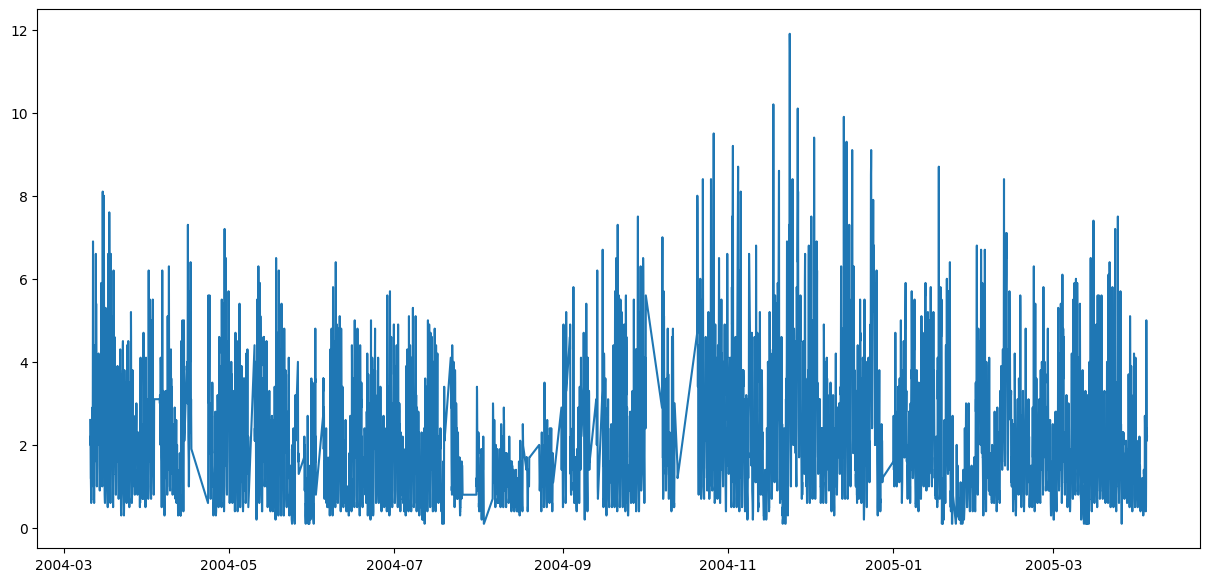

In [116]:
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['CO(GT)'])
plt.show()

On this scale we are unable to discern any patterns.

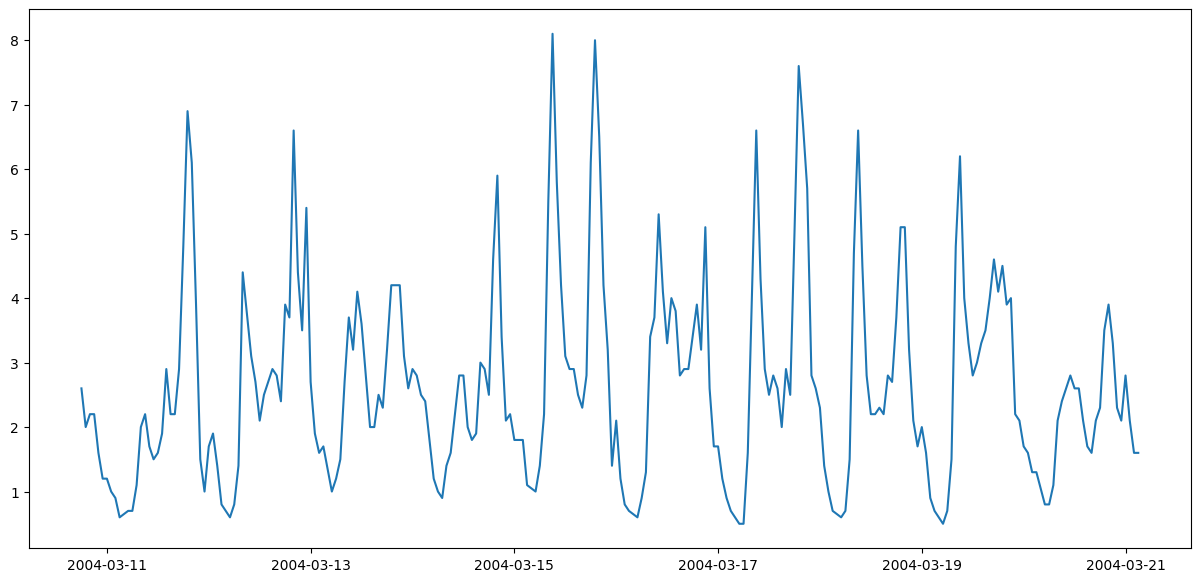

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data.index[:250], data['CO(GT)'][:250])
plt.show()

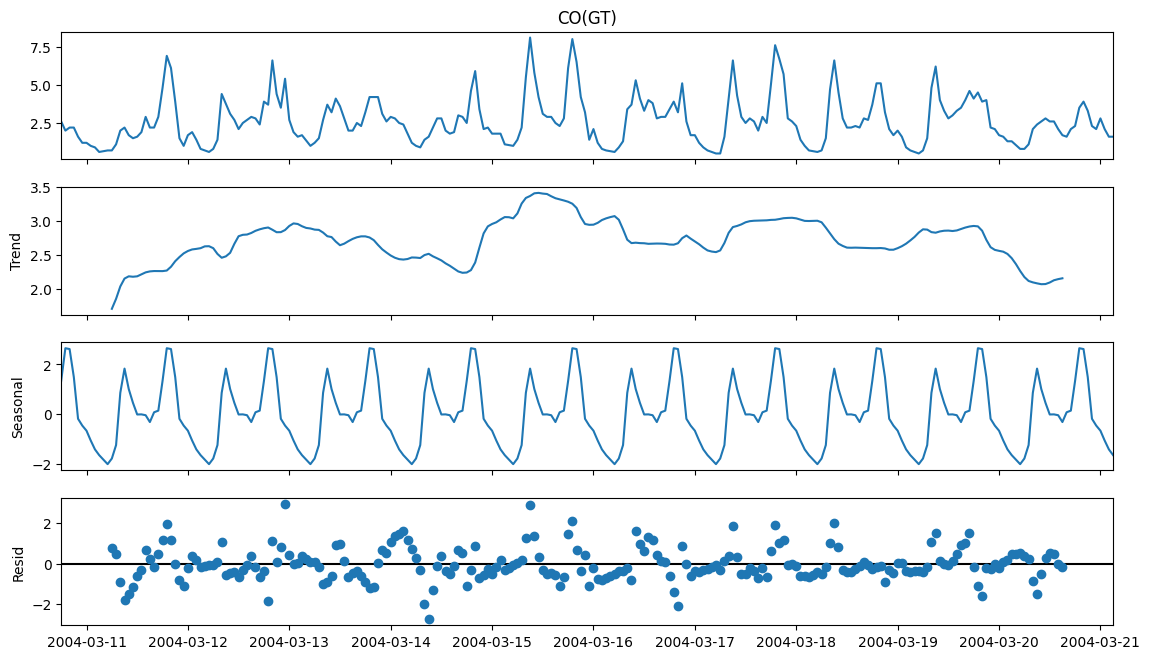

In [21]:
decomposition = seasonal_decompose(data['CO(GT)'][:250], model ='additive')
fig = decomposition.plot()
fig.set_size_inches((12, 7))
plt.show()

**Models**

In [117]:
x = data.iloc[:, :3]
y = data['CO(GT)']
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, shuffle=False)
y_test

,CO(GT)
2005-01-16 15:00:00,0.7
2005-01-16 16:00:00,1.1
2005-01-16 17:00:00,1.1
2005-01-16 18:00:00,1.2
2005-01-16 19:00:00,2.0
...,...
2005-04-04 10:00:00,3.1
2005-04-04 11:00:00,2.4
2005-04-04 12:00:00,2.4
2005-04-04 13:00:00,2.1


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Error for : 1.2301287853201138e-11%


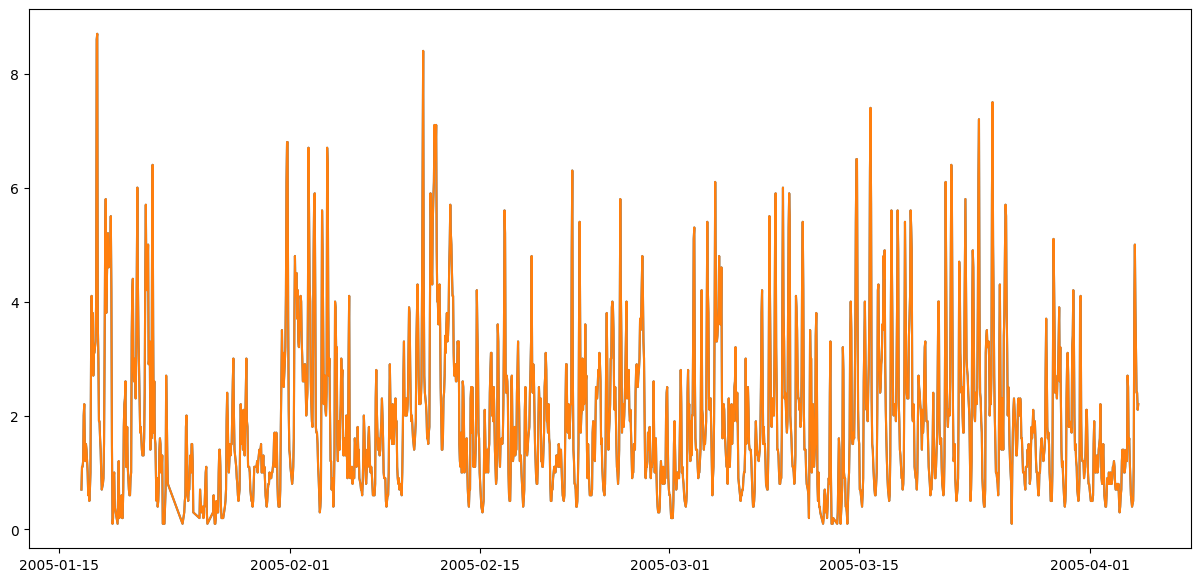

In [124]:
model = AutoReg(endog=y_train, trend='n', seasonal=True, exog=x_train, lags=[int(x) for x in np.linspace(start = 3, stop = 12, num = 4)]).fit()
predicted = model.predict(start=y_test.index[0], end=y_test.index[-1], exog_oos=x_test)

error = sklearn.metrics.mean_squared_error(y_test, predicted) ** 0.5 / np.mean(y)*100
print(f"Error for : {error}%")

plt.figure(figsize=(15, 7))
plt.plot(y_test)
plt.plot(predicted)
plt.show()